In [97]:
from neurocombat_sklearn import CombatModel
import pandas as pd
import numpy as np
from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [98]:
# Loading data
data = np.load('data/bladder-expr.npy')
covars = pd.read_csv('data/bladder-pheno.txt', delimiter='\t')
dfm = pd.DataFrame(data)
dfm.shape

(57, 22283)

In [99]:
def plot_dist(data):
    mp = UMAP(n_components=2, random_state=123)
    data2d = mp.fit_transform(data)
    dfp = pd.DataFrame(data2d,columns=['x', 'y']).join(covars)
    fig, ax = plt.subplots(figsize=(6,5))
    for bt in [1,2,3,4,5]:
        dfp1 = dfp[dfp.batch == bt]
        ax.scatter(dfp1.x, dfp1.y, label = bt)
    ax.legend()

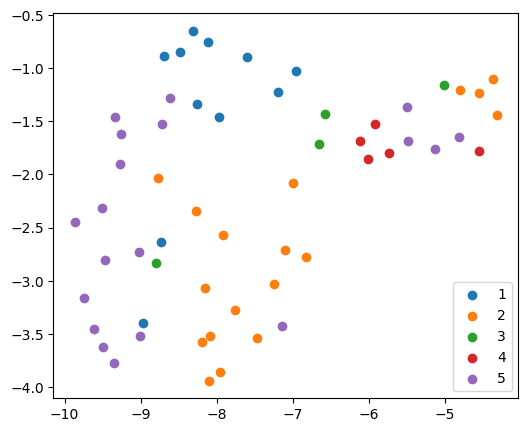

In [100]:
plot_dist(data)

In [101]:
# Creating model
model = CombatModel()
smp = covars[covars.batch == 2]

fit_data = data[smp.index]

model.fit(data, covars[['batch']])

# Harmonize data
# could be performed together with fitt by using .fit_transform method
data_combat = model.transform(data, covars[['batch']])

/home/was966/micromamba/envs/RNA/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


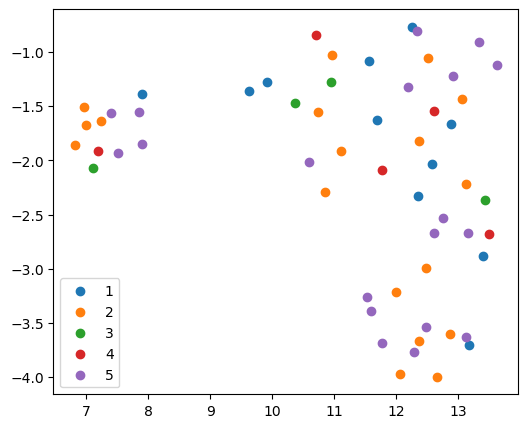

In [102]:
plot_dist(data_combat)

In [105]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,...,22273,22274,22275,22276,22277,22278,22279,22280,22281,22282
0,10.115170,5.345168,6.348024,8.901739,3.967672,7.775183,5.655863,4.855069,4.942097,3.638684,...,5.889822,6.255983,11.772870,11.650434,4.295802,3.902905,3.396659,3.319554,3.637277,3.475397
1,8.628044,5.063598,6.663625,9.439977,4.466027,7.110154,6.068074,4.971663,4.892139,3.896923,...,6.875853,6.832614,13.301387,13.092792,4.391424,3.725786,4.011382,3.477539,3.909711,3.710860
2,8.779235,5.113116,6.465892,9.540738,4.144885,7.248430,5.822590,4.955943,4.991248,4.057937,...,5.400099,6.301081,13.682598,13.497060,4.380636,4.139661,3.799011,3.491621,3.885286,3.524983
3,9.248569,5.179410,6.116422,9.254368,4.189338,7.017220,5.659677,5.028884,5.163996,3.833727,...,5.361622,5.519502,12.136462,11.808322,4.453195,3.838170,3.703706,3.392606,3.762326,3.783900
4,10.256841,5.181383,5.980457,8.798086,4.078509,7.896419,5.480801,4.838721,5.666031,3.675467,...,6.549468,7.006766,11.918717,11.822269,4.298520,3.889372,3.530179,3.382881,3.777308,3.439520
5,10.023133,5.248418,5.796155,8.002870,3.919740,7.944676,5.141930,4.688610,5.635379,3.650139,...,7.146261,7.351801,11.770457,11.609514,4.180763,3.888782,3.378287,3.341418,3.631794,3.438930
6,9.108034,5.252312,6.414849,9.093704,4.402590,7.469767,5.757393,5.063306,5.151760,4.044774,...,4.971877,5.437525,13.252039,13.177725,4.418610,3.917813,3.769529,3.500478,3.928444,3.912421
7,8.735616,5.220931,6.846798,9.263386,4.173666,7.281925,6.134735,5.001731,4.634037,4.075133,...,4.795820,5.289338,13.077570,13.140737,4.340074,3.765035,3.781147,3.620815,3.720592,3.591586
8,9.803271,5.595771,5.841478,7.789240,3.590649,7.367814,5.039009,4.629625,5.850502,3.586648,...,5.016912,4.600464,10.553368,10.549932,3.866587,3.534812,3.188380,3.203602,3.363358,3.371751
9,10.168602,5.025180,6.352257,9.834564,4.338196,7.825735,5.571846,4.691905,4.697245,3.956447,...,6.840086,6.829511,12.468495,12.425069,4.111634,3.859987,3.564584,3.407213,3.766254,3.692182


In [106]:
pd.DataFrame(data_combat)

,0,1,2,3,4,5,6,7,8,9,...,22273,22274,22275,22276,22277,22278,22279,22280,22281,22282
0,10.086492,5.519207,6.561742,8.789976,3.899327,7.776518,5.649287,4.804678,4.610682,3.611859,...,5.979696,6.143023,11.915522,11.914905,4.229549,3.835366,3.347666,3.312165,3.551101,3.466634
1,8.593022,5.113332,6.432693,9.223917,4.403982,7.019255,5.970764,4.950997,5.134118,3.838791,...,7.327389,7.257239,13.242710,13.048782,4.335479,3.668701,3.840894,3.402343,3.828767,3.591051
2,8.735540,5.158352,6.270198,9.316884,4.092681,7.158185,5.735524,4.934006,5.253532,4.032779,...,5.713963,6.668832,13.611983,13.447366,4.324597,3.998914,3.668168,3.415654,3.807098,3.429378
3,8.904952,5.262212,6.220636,9.194757,4.221116,6.861674,5.654296,5.054113,4.949743,3.929806,...,5.233426,5.159554,12.503669,12.172102,4.443575,3.732097,3.699706,3.419697,3.722042,3.744155
4,10.279650,5.265272,6.020385,8.670993,4.060228,7.922848,5.419312,4.781219,5.716855,3.671820,...,6.911681,7.145589,12.151444,12.194822,4.233246,3.813776,3.500751,3.405382,3.742522,3.434359
5,9.961007,5.369203,5.748943,7.758169,3.829743,7.981092,4.974144,4.565801,5.670019,3.630532,...,7.754865,7.606336,11.911618,11.848247,4.073117,3.812836,3.326602,3.344349,3.543606,3.433829
6,9.045478,5.284904,6.228251,8.904430,4.342488,7.380569,5.673047,5.050053,5.446926,4.016920,...,5.245793,5.712872,13.194908,13.132521,4.362903,3.821911,3.644190,3.424026,3.845386,3.766366
7,8.694423,5.256374,6.583223,9.060986,4.120581,7.191838,6.034643,4.983497,4.823142,4.053496,...,5.053312,5.548829,13.025903,13.096053,4.283679,3.700016,3.653639,3.537772,3.660991,3.487308
8,9.899764,5.510407,5.959972,8.070843,3.705901,7.400875,5.157916,4.667655,5.894279,3.672131,...,4.781682,4.572298,10.881761,10.884970,3.953725,3.614283,3.245927,3.262756,3.429802,3.429036
9,10.045210,5.078403,6.176814,9.587981,4.280068,7.738220,5.495244,4.648609,4.899299,3.910505,...,7.288285,7.253804,12.435903,12.390449,4.053238,3.775774,3.477504,3.335869,3.701500,3.574805
